In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pint
from pint import UnitRegistry
degree_sign= u'\N{DEGREE SIGN}'
import os

import math
import seaborn as sns

plt.rcParams.update({'font.size': 12})

def warn(*args, **kwargs): #supress warnings
    pass
import warnings
warnings.warn = warn

plt.tight_layout(h_pad = 3, w_pad=3)

import scipy.optimize
import scipy.interpolate as interp
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
from sklearn.metrics import r2_score

from ArtificialSpectra import ArtificialSpectra

<Figure size 432x288 with 0 Axes>

In [3]:
df_spectra = pd.read_csv("data/df_spectra.csv", 
                               header = 0, dtype=object, index_col="name")
df_props_id = pd.read_csv("data/df_props_id.csv", 
                               header = 0, dtype=object, index_col="name")
df_blend = pd.read_csv("data/blend_composition.csv", 
                                header = 0, dtype=object, index_col="name")
df_blend = df_blend.loc[df_blend['id_spectra_source'] == "exp"]

## Define volume percents of additive for which to generate artificial spectra

In [4]:
comps = [5, 10, 15, 20, 25, 30] # volume percentages of additive (of first listed)
plot_wv_numbers = [650, 800, 883, 911, 1031, 1051, 1464, 2729, 2800, 3000, 3322] # important wavelengths to plot abs vs composition
degree = 2 # interpolate spectra with this degree polynomial with all real spectra of the two additives

# Jet fuel blends

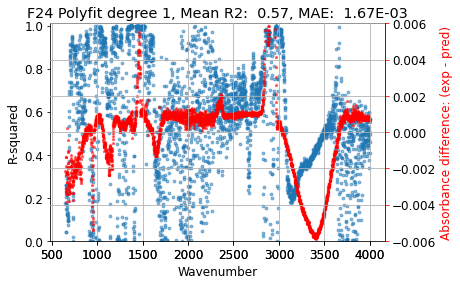

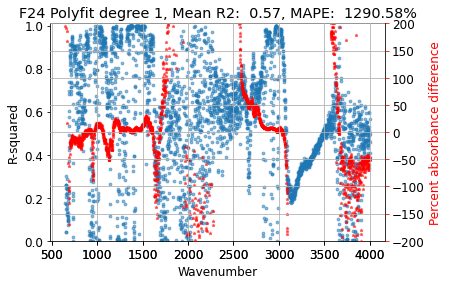

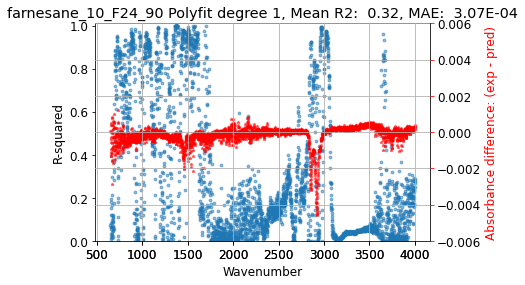

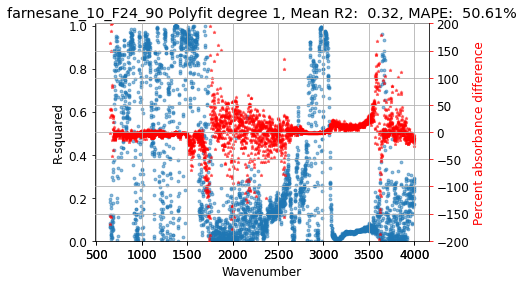

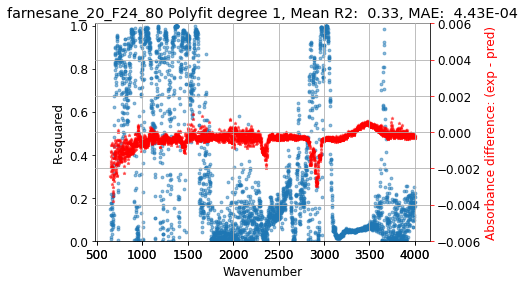

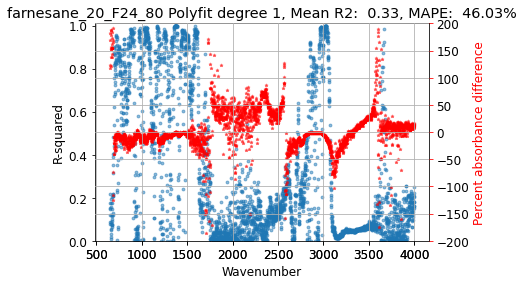

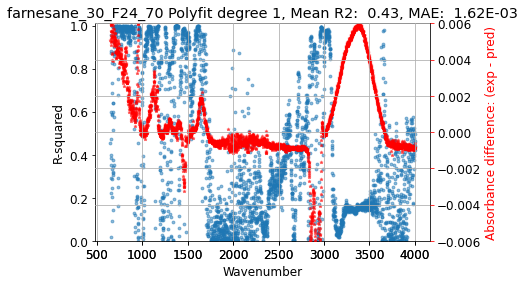

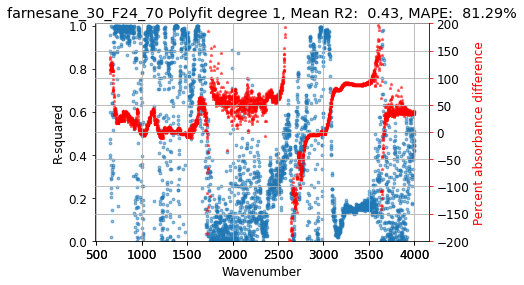

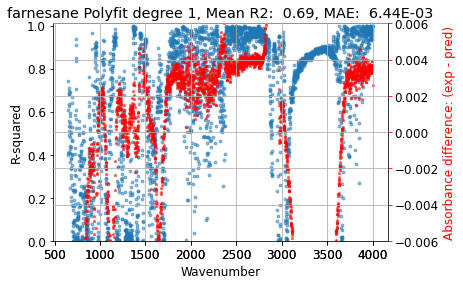

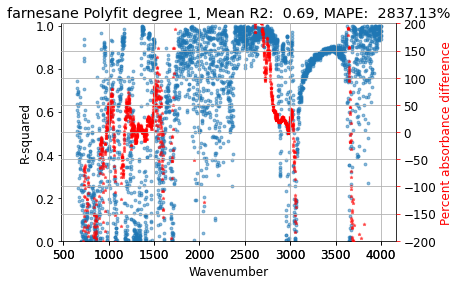

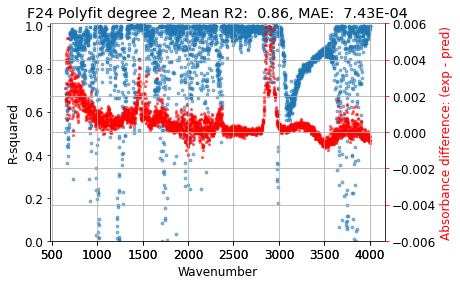

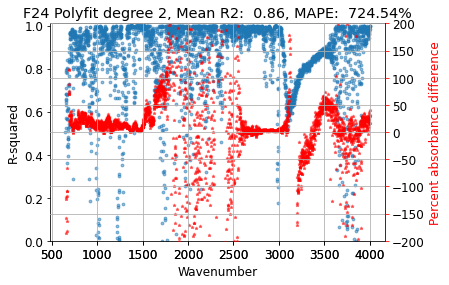

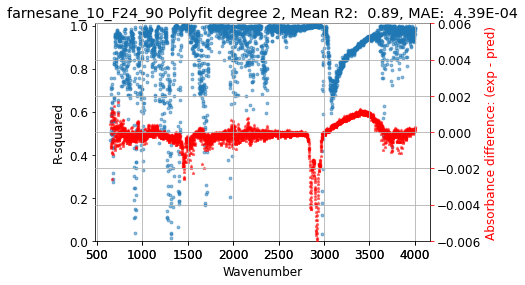

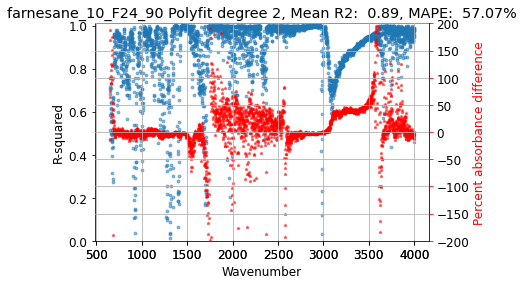

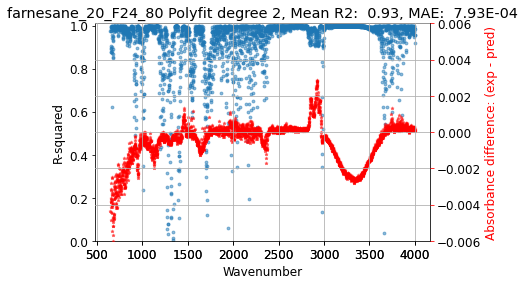

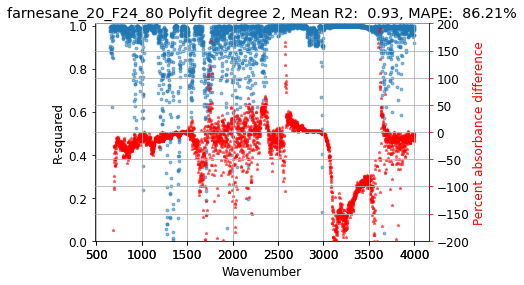

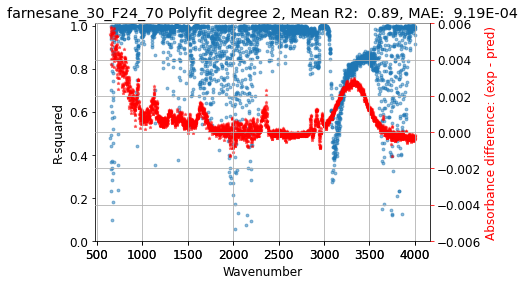

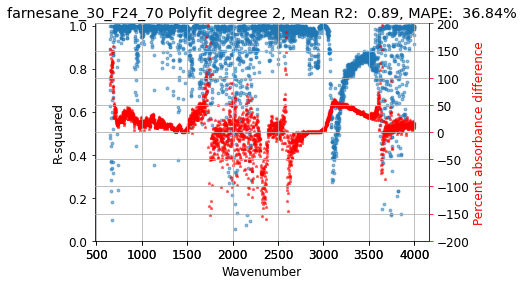

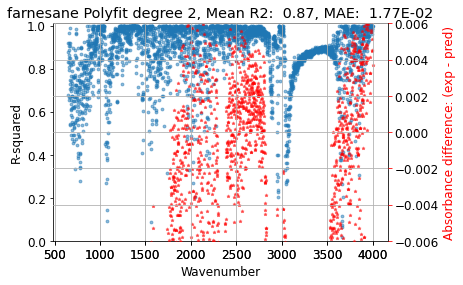

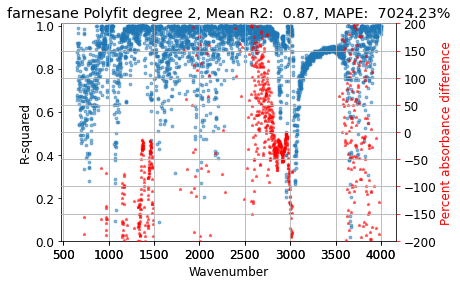

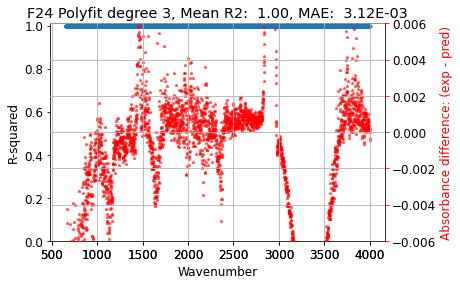

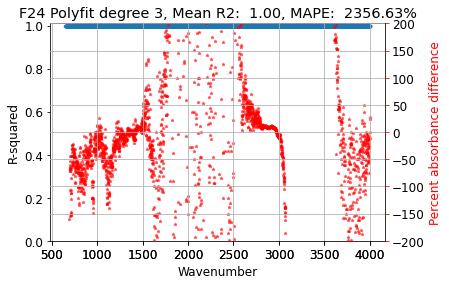

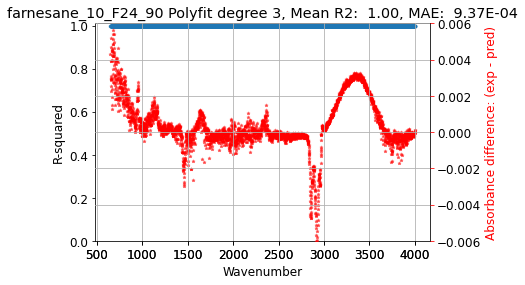

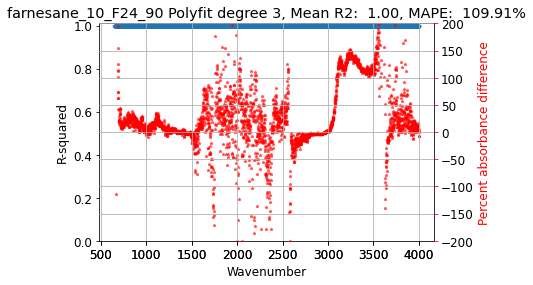

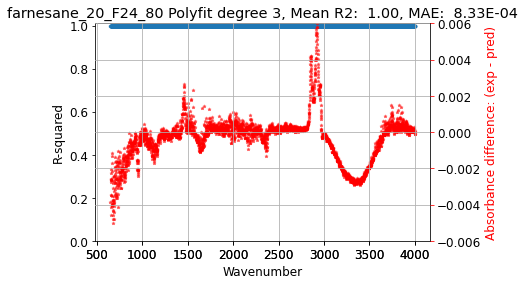

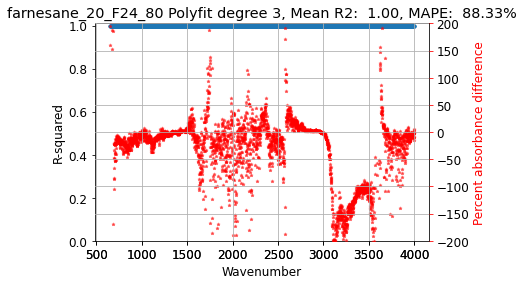

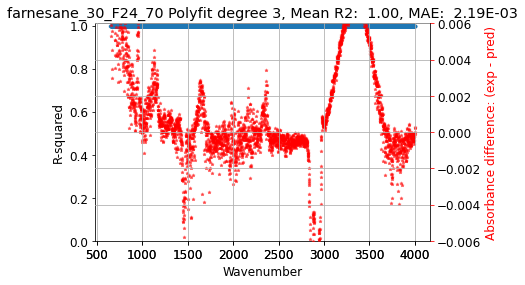

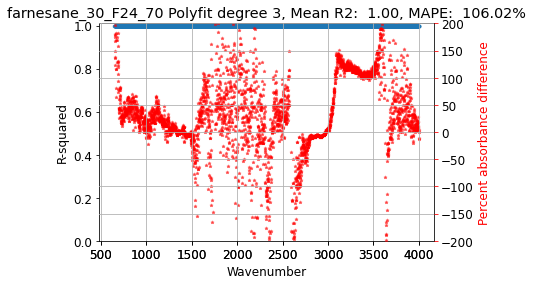

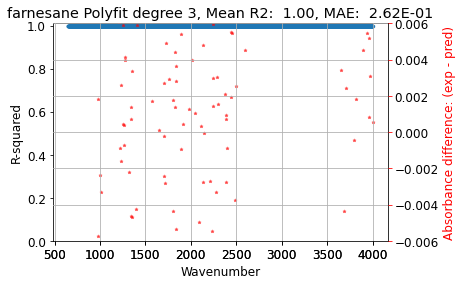

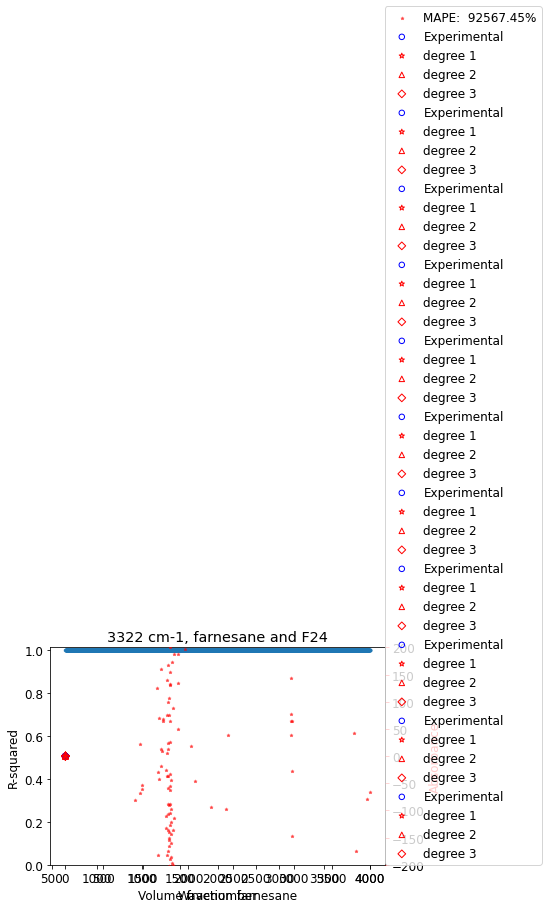

In [5]:
all_artificial_dicts = {}
#additives = ["farnesane", "pinane", "pmenthane", "RJ4"]
additives = ["farnesane"]

for additive in additives:
    
    spec = ArtificialSpectra([additive, "F24"])
    
    # Test spectra interpolation at every composition real spectra exists.
    spec.test_all_interp(degrees=[1, 2, 3]);
    
    # plot absorbance vs. volume fraction at select wavenumbers showing real and artificial spectra
    spec.just_wv_plots(plot_wv_numbers, [2], degrees=[1, 2, 3]);
    
    # Make interpolated spectra at requested compositions and save in data folder
    artificial_dicts = spec.make_all_interp_spectra(comps, degree)
    
    # make dictionary of artifical spectra fields
    all_artificial_dicts = {**all_artificial_dicts, **artificial_dicts}

### Make dataframe of artificial spectra fields

In [6]:
df_artificial = pd.DataFrame.from_dict(all_artificial_dicts, 
                            orient="index")
df_artificial

,id_spectra_filename,farnesane,F24,id_n_components,id_spectra_source
farnesane_05_F24_95_interp,../interpolated_spectra/farnesane_05_F24_95_in...,5.0,95.0,2,interpolated polyfit degree 2
farnesane_10_F24_90_interp,../interpolated_spectra/farnesane_10_F24_90_in...,10.0,90.0,2,interpolated polyfit degree 2
farnesane_15_F24_85_interp,../interpolated_spectra/farnesane_15_F24_85_in...,15.0,85.0,2,interpolated polyfit degree 2
farnesane_20_F24_80_interp,../interpolated_spectra/farnesane_20_F24_80_in...,20.0,80.0,2,interpolated polyfit degree 2
farnesane_25_F24_75_interp,../interpolated_spectra/farnesane_25_F24_75_in...,25.0,75.0,2,interpolated polyfit degree 2
farnesane_30_F24_70_interp,../interpolated_spectra/farnesane_30_F24_70_in...,30.0,70.0,2,interpolated polyfit degree 2


In [7]:
# merge with df_artificial_spectra_to_add. fill in zeros for extra additives
df_artificial_blend = pd.concat([df_blend, df_artificial])
df_artificial_blend = df_artificial_blend.fillna(0.0)
df_artificial_blend

,id_spectra_filename,id_n_components,id_spectra_source,id_label,n-heptane,isooctane,methylcyclohexane,toluene,1-hexene,ethanol,diisobutylene,xylenes,farnesane,pmenthane,pinane,RJ4,F24
farnesane_10_F24_90,farnesane05_jeta45_1_110920.csv,2,exp,farnesane blend,0,0,0,0,0,0,0,0,10,0,0,0,90
farnesane_20_F24_80,farnesane10_jeta40_1_110920.csv,2,exp,farnesane blend,0,0,0,0,0,0,0,0,20,0,0,0,80
farnesane_30_F24_70,farnesane15_jeta35_1_110920.csv,2,exp,farnesane blend,0,0,0,0,0,0,0,0,30,0,0,0,70
pinane_10_F24_90,pinane05_jeta45_1_111820.csv,2,exp,pinane blend,0,0,0,0,0,0,0,0,0,0,10,0,90
pinane_20_F24_80,pinane10_jeta40_1_111820.csv,2,exp,pinane blend,0,0,0,0,0,0,0,0,0,0,20,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
farnesane_10_F24_90_interp,../interpolated_spectra/farnesane_10_F24_90_in...,2,interpolated polyfit degree 2,0,0,0,0,0,0,0,0,0,10,0,0,0,90
farnesane_15_F24_85_interp,../interpolated_spectra/farnesane_15_F24_85_in...,2,interpolated polyfit degree 2,0,0,0,0,0,0,0,0,0,15,0,0,0,85
farnesane_20_F24_80_interp,../interpolated_spectra/farnesane_20_F24_80_in...,2,interpolated polyfit degree 2,0,0,0,0,0,0,0,0,0,20,0,0,0,80
farnesane_25_F24_75_interp,../interpolated_spectra/farnesane_25_F24_75_in...,2,interpolated polyfit degree 2,0,0,0,0,0,0,0,0,0,25,0,0,0,75


In [24]:
# merge with df_blend, resave
df_artificial_blend.to_csv("data/blend_composition.csv", index_label="name")
# add to df_split, with a 2 for exclusion default

# Surrogate binary blends

In [13]:
additives = ["n-heptane", "isooctane"]
spec = ArtificialSpectra(additives)
spec.test_all_interp(degrees=[1, 2, 3])
spec.just_wv_plots(plot_wv_numbers, [2], degrees=[1, 2, 3])

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [14]:
additives = ["n-heptane", "ethanol"]
spec = ArtificialSpectra(additives)
spec.test_all_interp(degrees=[1, 2, 3])
spec.just_wv_plots(plot_wv_numbers, [2], degrees=[1, 2, 3])

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [15]:
additives = ["isooctane", "ethanol"]
spec = ArtificialSpectra(additives)
spec.test_all_interp(degrees=[1, 2, 3])
spec.just_wv_plots(plot_wv_numbers, [2], degrees=[1, 2, 3])

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [16]:
additives = ["diisobutylene", "isooctane"]
spec = ArtificialSpectra(additives)
spec.test_all_interp(degrees=[1, 2, 3])
spec.just_wv_plots(plot_wv_numbers, [2], degrees=[1, 2, 3])

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [17]:
additives = ["toluene", "ethanol"]
spec = ArtificialSpectra(additives)
spec.test_all_interp(degrees=[1, 2, 3])
spec.just_wv_plots(plot_wv_numbers, [2], degrees=[1, 2, 3])

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# Add artificial spectra to dataframes

In [18]:
# add artificial spectra to df_blend

In [19]:
# add to split dataframe